In [62]:
%matplotlib notebook

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates
import datetime
import math
from scipy import optimize

In [64]:
1+1 

2

In [30]:
from github import Github

In [31]:
#g = Github("username", "password")

In [65]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [66]:
contents = repo.get_contents("")

In [67]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [68]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [69]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [70]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

In [71]:
import bs4 as bs
import urllib.request

In [72]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [73]:
print(len(files))

73


In [74]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [75]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


In [76]:
state_conf_dict    = {}
state_death_dict   = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
        

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

73
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591. 81661. 81782. 81897. 81999. 82122. 82198. 82279.
 82361. 82432. 82511.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316. 3322.
 3326.]
[2.8000e+01 3.0000e+01 3.

 5.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   2.   2.   2.   9.  15.  15.  17.  18.  18.  24.  29.
  34.  34.  37.  37.  51.  51.  53.  62.  62.  62.  72.  72.  78.  78.
  78.  78.  78.  78.  78.  78.  78.  96.  96.  97. 105. 105. 109. 114.
 114. 114. 124. 140. 144. 152. 156. 160. 172. 183. 198. 212. 228. 240.
 245. 266. 282.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.46296296
 0.43956044 0.39292731 0.

 17.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         4.
 4.         4.         3.33333333 2.94117647 5.55555556 5.12820513
 7.5       ]
Vatican City
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4.
 4.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
 2.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0

In [77]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 5.000e+00 5.000e+00 5.000e+00 5.000e+00 6.000e+00
 6.000e+00 6.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00 8.000e+00
 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00
 8.000e+00 1.200e+01 1.200e+01 1.200e+01 1.200e+01 1.700e+01 1.700e+01
 1.060e+02 1.080e+02 1.470e+02 1.710e+02 1.710e+02 1.710e+02 3.480e+02
 3.610e+02 6.810e+02 8.690e+02 1.072e+03 2.665e+03 5.644e+03 7.024e+03
 8.474e+03 9.001e+03 9.707e+03]


In [78]:
# Print the total number of reporting days we have
print(days)

73


In [79]:
dates = [datetime.date(2020,1,22) + datetime.timedelta(days=i) for i in range(days)]
print(dates)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [80]:
def lastelem(elem):
    #print(elem)
    #print(len(elem))
    lelem = len(elem[1])
    #print(len(elem[1]))
    #print(elem[1][lelem-1])
    return (elem[1][lelem-1])

test = country_conf_dict
test_sort = sorted(test.items(), key=lastelem, reverse=True)

for location in test_sort:
    lelem = len(location[1])
    if (location[1][lelem-1] > 10000):
        #print(location)
        #print(len(location))
        print(location[0],end=",")
print("")

US,Italy,Spain,Germany,China,France,Iran,United Kingdom,Turkey,Switzerland,Belgium,Netherlands,Canada,Austria,South Korea,


In [81]:
# Population in the milllions

population_dict = {} 
population_dict['US']             = 324
population_dict['Italy']          = 59.4

#population_dict['China-Hubei']   = 58.16
#population_dict['China']          = 1400
population_dict['China']          = 58.16

population_dict['Spain']          = 46.4 
population_dict['Germany']        = 82.1
population_dict['France']         = 65  
population_dict['Iran']           = 81.2
population_dict['United Kingdom'] = 66.2
population_dict['Switzerland']    = 8.48
population_dict['Netherlands']    = 17
population_dict['Belgium']        = 11.4
population_dict['South Korea']    = 51.47

# Given the ability that China has to close borders, Hubei becomes like a country
# so the population divisor should really be the population of Hubei, but we left
# it has China

<IPython.core.display.Javascript object>


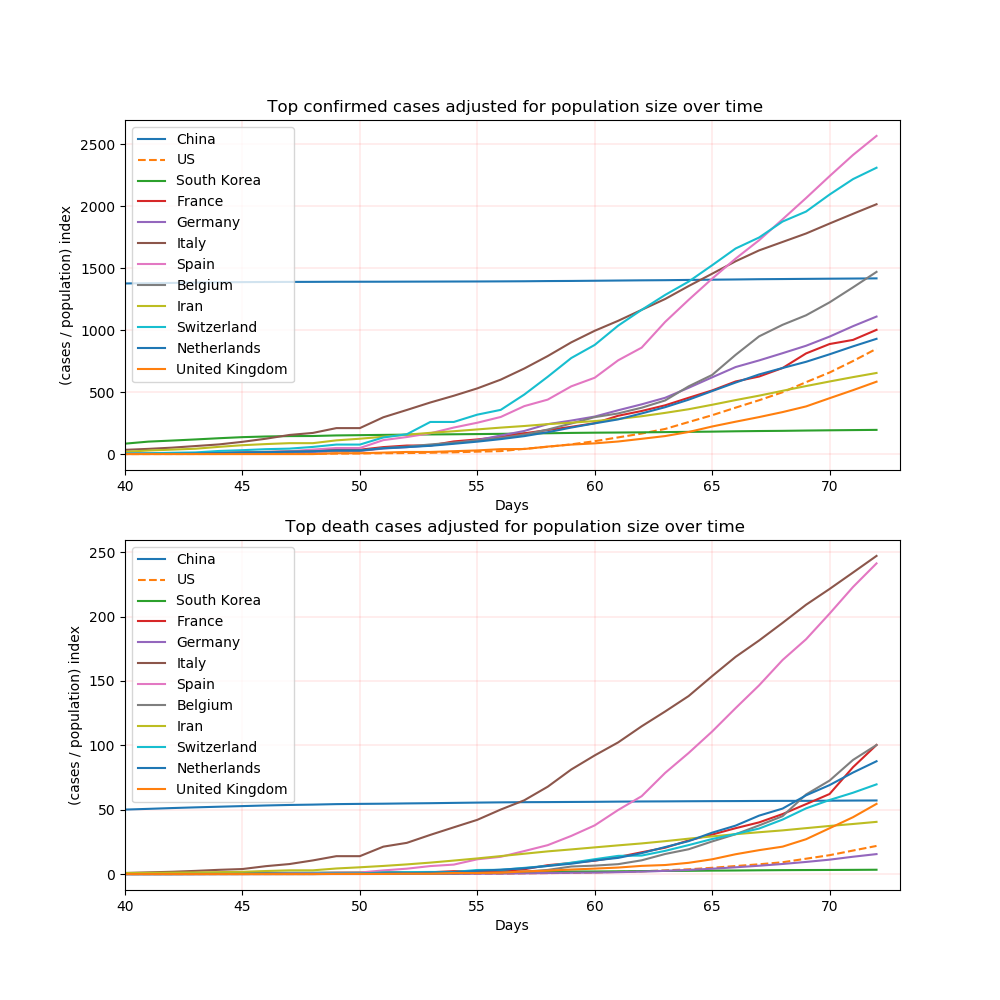

In [82]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(40, days)
#ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('linear')


ax[1].set_xlim(40, days)
#ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('linear')

                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            #x = dates
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  


In [83]:
#####################################################################

Log plot

#####################################################################

SyntaxError: invalid syntax (<ipython-input-83-884fa541e8d5>, line 3)

<IPython.core.display.Javascript object>


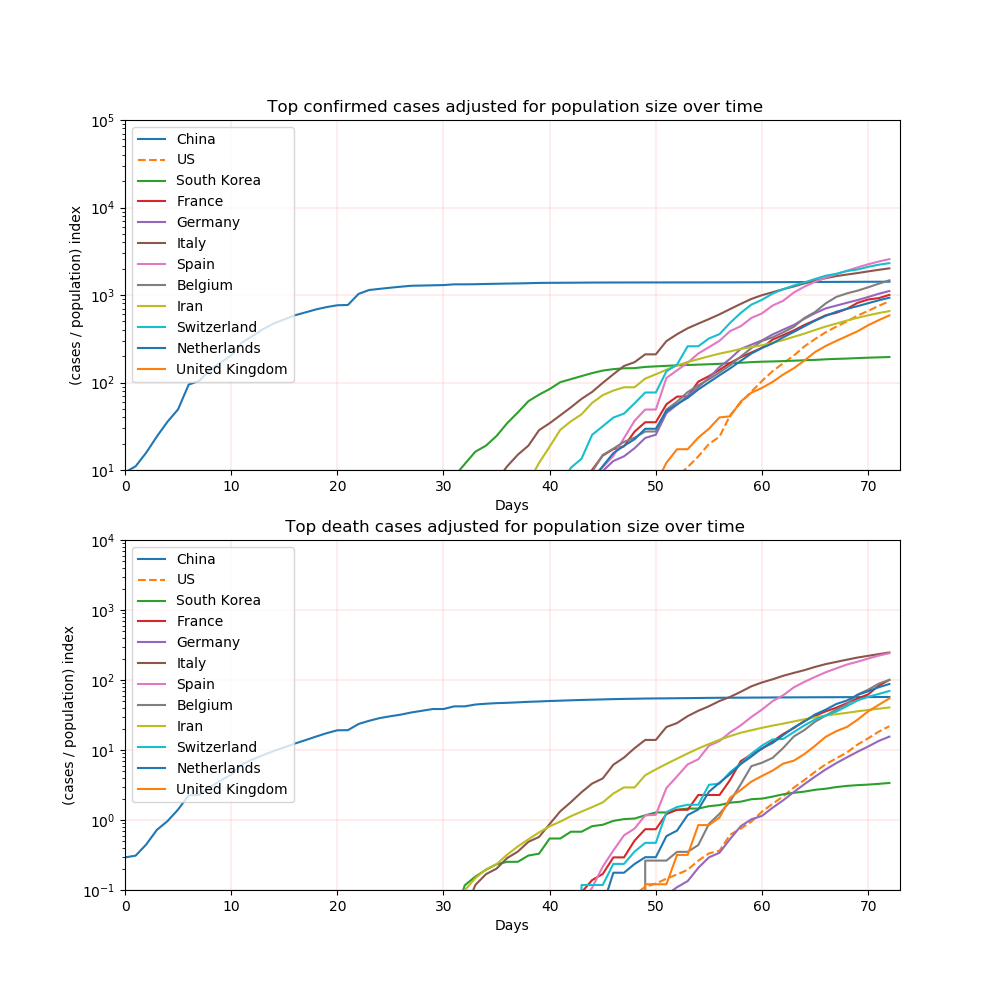

In [84]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(0, days)
ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('log', basey=10)


ax[1].set_xlim(0, days)
ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('log', basey=10)
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
                
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  
    

<IPython.core.display.Javascript object>


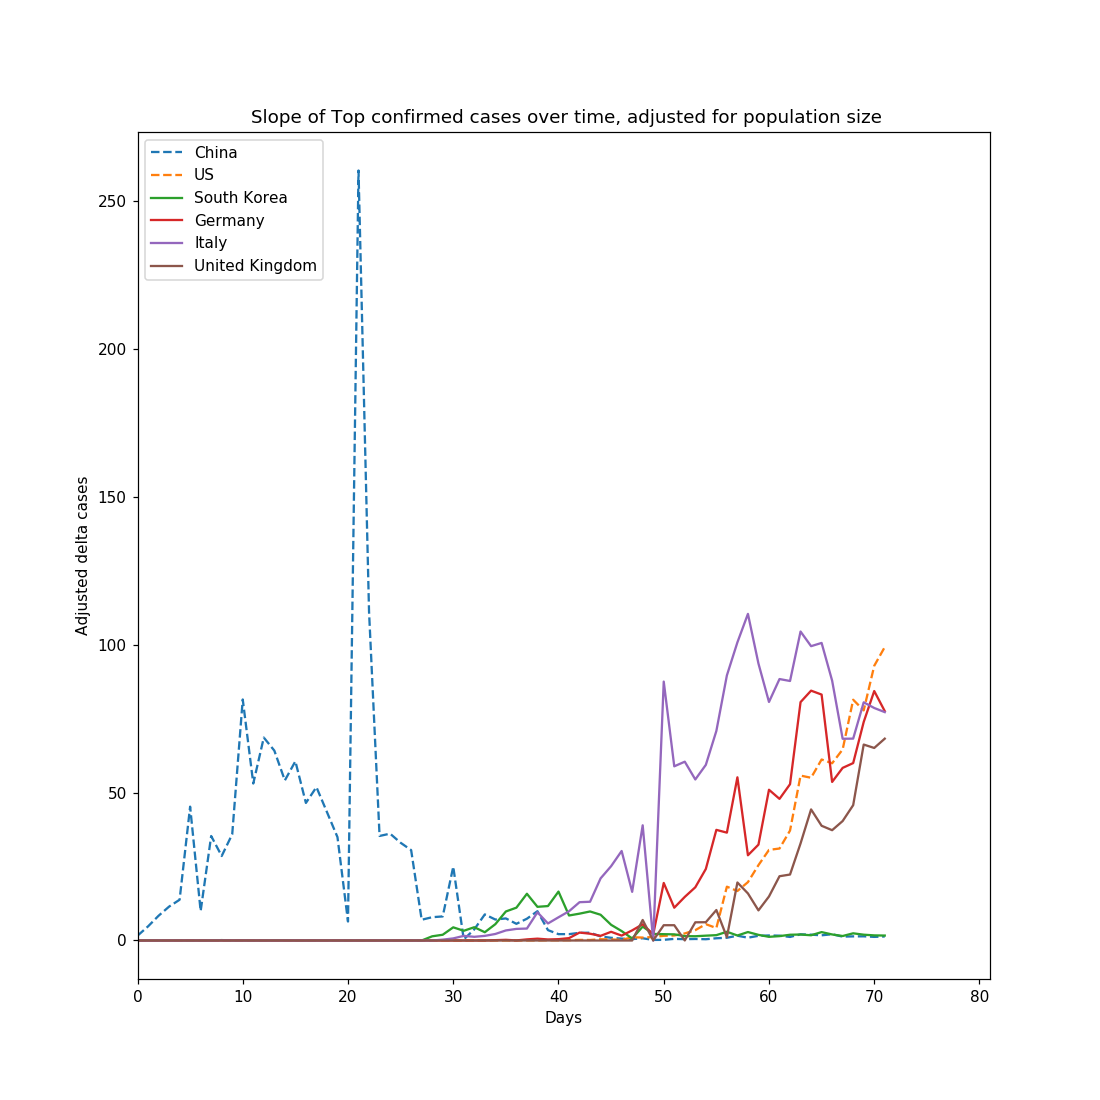

In [197]:
# Plot the deriavtive of the confirmed

fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Slope of Top confirmed cases over time, adjusted for population size")
ax.set_ylabel("Adjusted delta cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 'Iran (Islamic Republic of)']  
include_list = ['China', 'US', 'Italy', 'Germany', 'South Korea', 'United Kingdom']
                        
# Daily total for all of the cities summed together
for CNT in Dcountry_conf_dict:
    #print(CNT)
    if (str(include_list).find(CNT) > 0)  :
        x = range(0,len(Dcountry_conf_dict[CNT]))
        y = Dcountry_conf_dict[CNT]   /  population_dict[CNT]   
        if ("US" in CNT) or ("China" in CNT) or ("Itay" in CNT):
            ax.plot(x,y, label=CNT, linestyle='--')
        else:
            ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")  

In [ ]:
#####################################################################

Timeline projection

We should be using the epidemiological curve, but we are using a normal
distribution, to represent the distibution of time. We are also pulling from 
our other analysis that shows the US delay to Italy is about 15 days.

We are trying to normalize the curves, and for the US we are making the
assumption that the max slope is 30,000.

#####################################################################

<IPython.core.display.Javascript object>


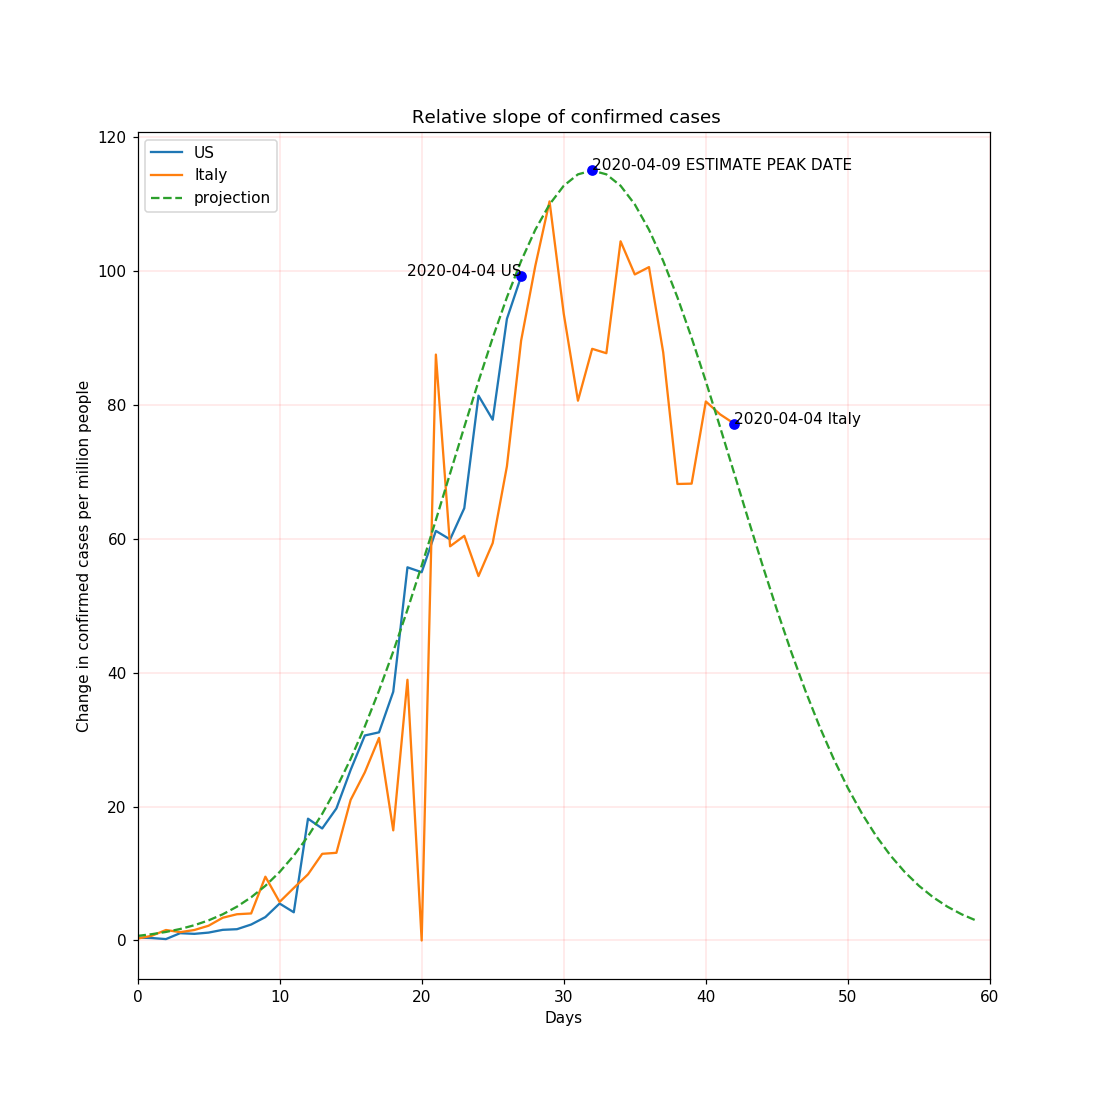

US 27 99.17592592592592
Italy 42 77.1885521885522
115.0 32


Text(0.5, 1.0, ' Relative slope of confirmed cases')

In [199]:
fig, ax = plt.subplots(figsize = (10,10))  

# Number of days to project
#
projected         = 60

# What day is it
#
datetime_object = datetime.datetime.now()

# Init graph
#
ax.set_xlim(0, projected)
#ax.set_ylim(5, 200000)
ax.set_ylabel("Change in confirmed cases per million people")
ax.set_xlabel("Days")
ax.set_yscale('linear')

# Max slope for each country, used to normalize
#
include_list = {"US" : 50000, "Italy" : 6500}
offset_list  = {"US" : 20000, "Italy" : 500}

# List of dates to notate
#
# (first point) US 27 99.17592592592592, Italy 42 77.1885521885522
dates = {  "27" : [99.17592592592592, "2020-04-04 US"], "42" : [77.1885521885522,  "2020-04-04 Italy"],
           "32" : [115.0, "2020-04-09 ESTIMATE PEAK DATE"]}


# Equation for curve fit
#
def test_func(x, a, b):
    return ( 25 * (1/(2.5*a)) * np.exp(  -1 * (x-b)**2 / (2*(a**2)) )  )

# Plot death rate for US
#
for CNT in country_conf_dict:
    
        if (str(include_list).find(CNT) >=0 ):
            
            projected_country = CNT
            fit_cut           = offset_list[CNT]/include_list[CNT]
            gain_adjust       = include_list[CNT]

            x = range(0,len(country_conf_dict[CNT]))
            #y1 = country_death_dict[CNT]
            y1 = Dcountry_conf_dict[CNT] / population_dict[CNT]
            
            # Find first non-zero data
            first_point = 0
            first_value = 0
            for i in range(0,len(y1)):
                if (y1[i] > fit_cut):
                    first_point = i
                    first_value = y1[i]
                    break
                              
            #print(first_point)
            #print(first_value)

            # Remove time delay offset for curve fit
            #
            fit_x = []
            fit_y = []
            for i in range(first_point, len(y1)):
                fit_x.append(i - first_point);
                fit_y.append(y1[i])
    
            ax.plot(fit_x,fit_y, label=projected_country)
            #ax.plot(fit_x[-1],fit_y[-1], 'bo-') 
        
            ax.grid(color='r', linestyle='-', linewidth=0.1)          
            ax.legend(loc="upper left")   

            # Perform the equation fit operation (TBD)
            #
            #params, params_covariance = optimize.curve_fit(test_func, fit_x, fit_y, p0=[0, 0])
            #print(params)
            
            # Calculate equation of the projected line, to be used in the plot 
            #
            #y2.append(5*(math.exp(0.23*(i-40))))
            #offset = first_point
            #x2 = range(0, days+projected)
            #sy2 = test_func(x2, params[0], params[1]) 

            # print current time label, to be added to dates dictionary above
            #
            print(CNT,fit_x[-1], fit_y[-1])
                   
                     
# Plot projected line
#
x2 = range(0, projected)
y2 = []
shift = -2
for i in range(shift, projected+ shift):
    y2.append( 115 * test_func(i, 10, 30) )

max_value = max(y2) 
max_index = y2.index(max_point)
print(max_value,max_index)
    
ax.plot(x2,y2, label='projection', linestyle='--')                 
ax.grid(color='r', linestyle='-', linewidth=0.1)          
ax.legend(loc="upper left")  

# Label previous dates:
# 
for i in dates:
    loc   = int(i)
    value = dates[i][0]
    lbl   = dates[i][1]
    if (loc < 30):
        ax.plot(loc,value, 'bo') 
        ax.text(loc,value,lbl,horizontalalignment='right')
    else:
        ax.plot(loc,value, 'bo') 
        ax.text(loc,value,lbl,horizontalalignment='left')        

# Update Title to indicate date, and prediction
#
ax.set_title(" Relative slope of confirmed cases")
